## Milestone 3:  Exploratory Data Analysis (EDA)

In [3]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import pandas as pd
df=pd.read_csv("dynamic_pricing.csv")

In [5]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [6]:
# Outliers detection using IQR method 

def find_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return series[(series < low) | (series > high)]

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_summary = {}
for col in num_cols:
    outliers = find_iqr_outliers(df[col])
    outlier_summary[col] = {'outlier_count': outliers.shape[0],
                            'outlier_fraction': outliers.shape[0] / df.shape[0]}
pd.DataFrame(outlier_summary).T


,outlier_count,outlier_fraction
Number_of_Riders,0.0,0.00
Number_of_Drivers,10.0,0.01
Number_of_Past_Rides,0.0,0.00
Average_Ratings,0.0,0.00
Expected_Ride_Duration,0.0,0.00
Historical_Cost_of_Ride,0.0,0.00


In [7]:
# #1.	Handle categorical variables (Encoding)
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Label Encoding for ordinal column
# le = LabelEncoder()
# df['Customer_Loyalty_Status'] = le.fit_transform(df['Customer_Loyalty_Status'])

# # One-Hot Encoding for nominal columns
# df = pd.get_dummies(df, columns=["Location_Category", "Time_of_Booking", "Vehicle_Type"], drop_first=True)

# print("✅ Encoding complete. Columns now are:")
# print(df.columns)


In [ ]:
# Summary statistics and group correlations 
# overall summary:
display(df.describe().T)

# groupby summary: by Customer_Loyalty_Status (original column)
grouped = df.groupby('Customer_Loyalty_Status').agg({
    'Historical_Cost_of_Ride': ['mean', 'median', 'std'],
    'Number_of_Riders': ['mean', 'median']
})
display(grouped)

# correlation between target and numeric features (sorted)
corr_target = df.select_dtypes(include=[np.number]).corr()['Historical_Cost_of_Ride'].abs().sort_values(ascending=False)
corr_target


,count,mean,std,min,25%,50%,75%,max
Number_of_Riders,1000.0,60.372000,23.701506,20.000000,40.000000,60.000000,81.000000,100.000000
Number_of_Drivers,1000.0,27.076000,19.068346,5.000000,11.000000,22.000000,38.000000,89.000000
Number_of_Past_Rides,1000.0,50.031000,29.313774,0.000000,25.000000,51.000000,75.000000,100.000000
Average_Ratings,1000.0,4.257220,0.435781,3.500000,3.870000,4.270000,4.632500,5.000000
Expected_Ride_Duration,1000.0,99.588000,49.165450,10.000000,59.750000,102.000000,143.000000,180.000000
Historical_Cost_of_Ride,1000.0,372.502623,187.158756,25.993449,221.365202,362.019426,510.497504,836.116419


Historical_Cost_of_Ride                          \
                                           mean      median         std   
Customer_Loyalty_Status                                                   
Gold                                 376.118746  373.975636  184.967070   
Regular                              380.125251  358.951011  189.611633   
Silver                               362.772140  348.669562  186.956263   

                        Number_of_Riders         
                                    mean median  
Customer_Loyalty_Status                          
Gold                           59.086262   59.0  
Regular                        62.746875   66.0  
Silver                         59.397820   57.0

Historical_Cost_of_Ride    1.000000
Expected_Ride_Duration     0.927547
Number_of_Past_Rides       0.035859
Number_of_Drivers          0.017082
Number_of_Riders           0.005826
Average_Ratings            0.001063
Name: Historical_Cost_of_Ride, dtype: float64

In [8]:
# 2. Segmentations
# Avg ride price by customer loyalty
print("\nAverage Ride Price by Loyalty Status:")
print(df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].mean())

# Avg ride price by location
print("\nAverage Ride Price by Location:")
print(df.groupby("Location_Category")["Historical_Cost_of_Ride"].mean())

# Avg ride price by time of booking
print("\nAverage Ride Price by Time of Booking:")
print(df.groupby("Time_of_Booking")["Historical_Cost_of_Ride"].mean())



Average Ride Price by Loyalty Status:
Customer_Loyalty_Status
Gold       376.118746
Regular    380.125251
Silver     362.772140
Name: Historical_Cost_of_Ride, dtype: float64

Average Ride Price by Location:
Location_Category
Rural       379.942172
Suburban    374.319486
Urban       363.673259
Name: Historical_Cost_of_Ride, dtype: float64

Average Ride Price by Time of Booking:
Time_of_Booking
Afternoon    380.818228
Evening      364.253957
Morning      378.062094
Night        367.009354
Name: Historical_Cost_of_Ride, dtype: float64


,Customer_Loyalty_Status,mean,count,median
0,Gold,376.118746,313,373.975636
1,Regular,380.125251,320,358.951011
2,Silver,362.772140,367,348.669562


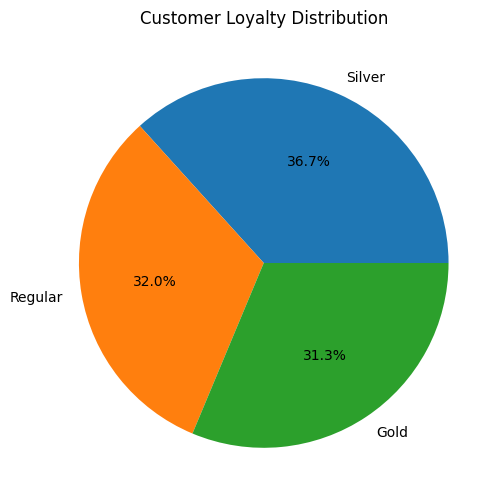

In [20]:
# Customer segmentation: price by loyalty status
seg = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].agg(['mean','count','median']).reset_index()
display(seg)

# Pie chart of loyalty distribution (counts)
plt.figure(figsize=(6,6))
plt.pie(df['Customer_Loyalty_Status'].value_counts(), labels=df['Customer_Loyalty_Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Customer Loyalty Distribution')
plt.show()


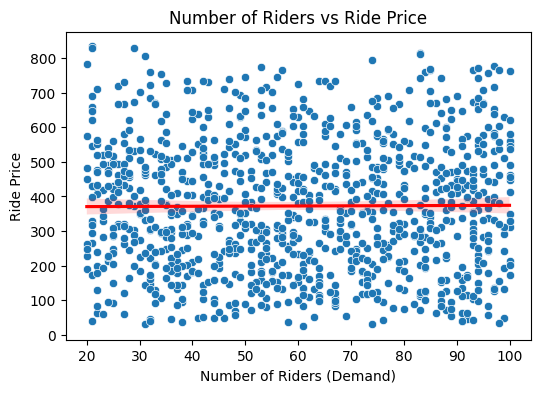

In [9]:
#3. Scatter plot (Riders vs. Price) 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x="Number_of_Riders", y="Historical_Cost_of_Ride", data=df)
sns.regplot(x="Number_of_Riders", y="Historical_Cost_of_Ride", data=df, scatter=False, color="red")
plt.title("Number of Riders vs Ride Price")
plt.xlabel("Number of Riders (Demand)")
plt.ylabel("Ride Price")
plt.show()


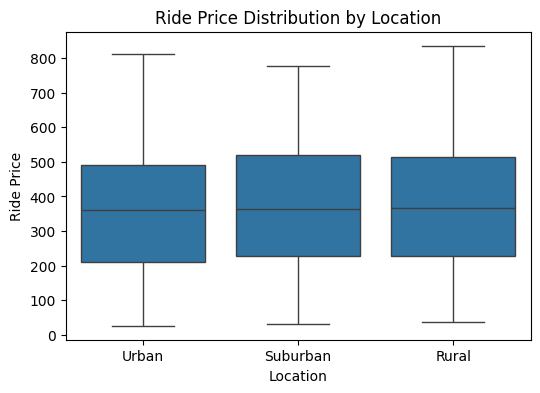

In [ ]:
# 4. Boxplot by location 
plt.figure(figsize=(6,4))
sns.boxplot(x="Location_Category", y="Historical_Cost_of_Ride", data=df)
plt.title("Ride Price Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Ride Price")
plt.show()



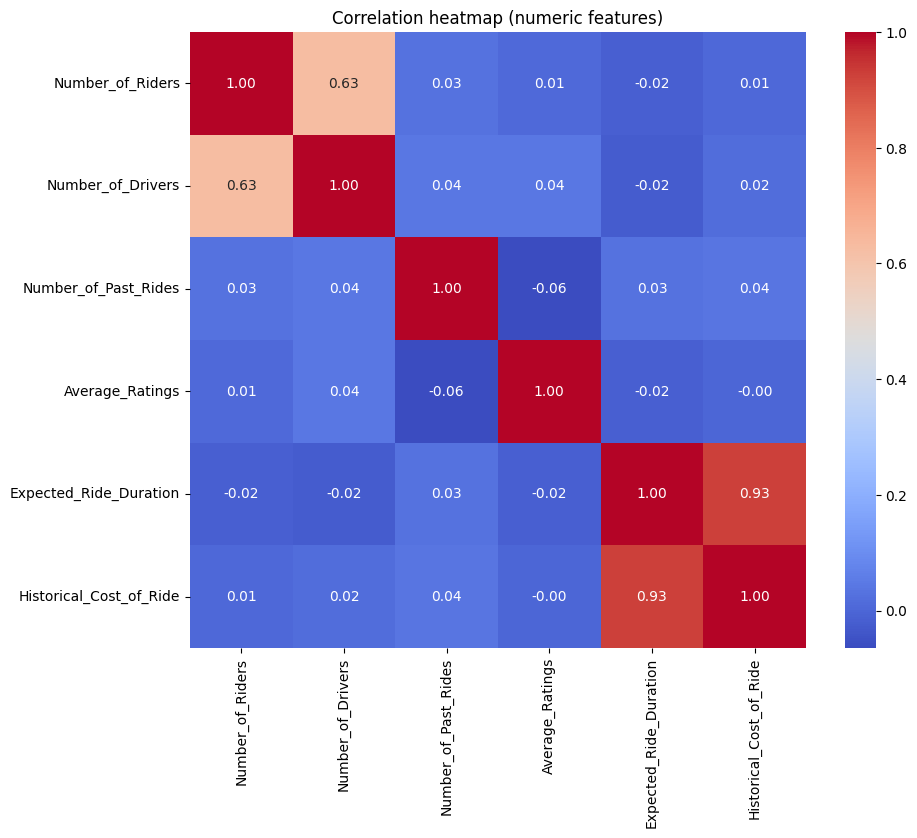

In [11]:
# 5.Correlation heatmap
plt.figure(figsize=(10,8))
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation heatmap (numeric features)")
plt.show()


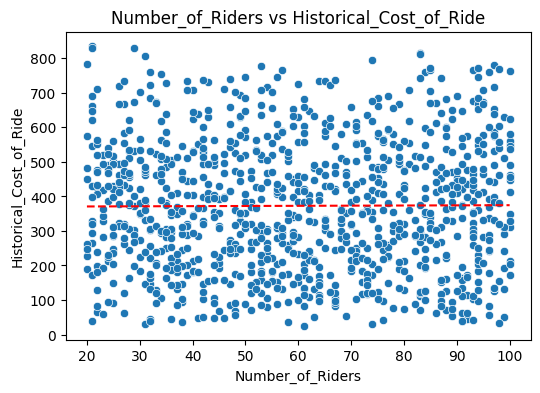

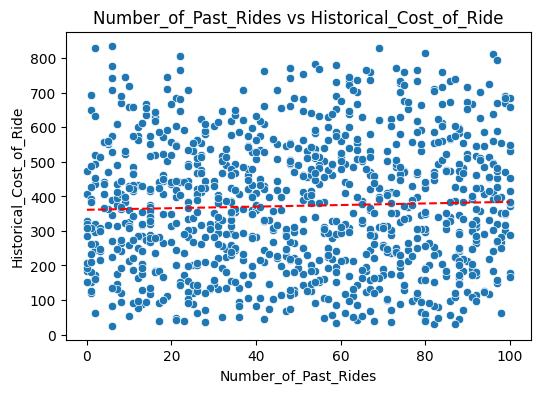

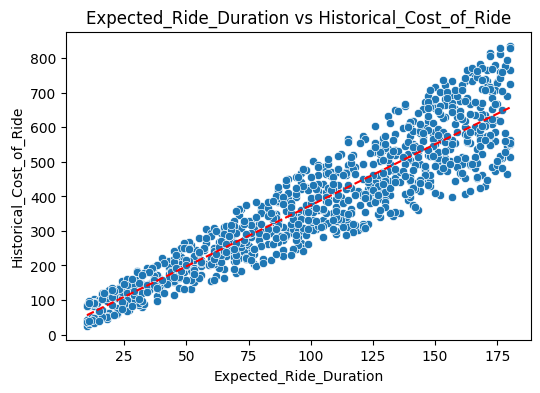

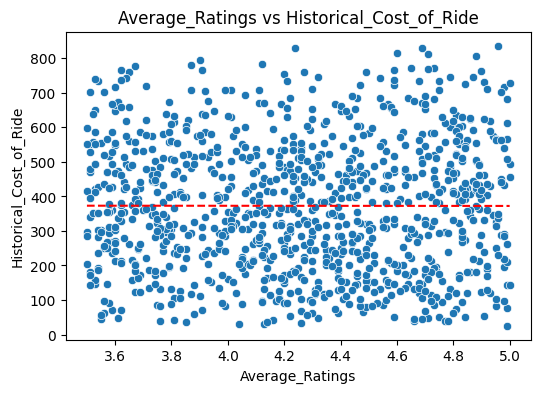

In [16]:
# 6.Check linearity: scatter plots with regression fit
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

target = 'Historical_Cost_of_Ride'
features_to_check = ['Number_of_Riders', 'Number_of_Past_Rides', 'Expected_Ride_Duration', 'Average_Ratings']

for col in features_to_check:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df[target])
    # addition of simple regression line
    lr = LinearRegression()
    X = df[[col]].fillna(df[col].median())
    y = df[target]
    lr.fit(X, y)
    xs = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1,1)
    plt.plot(xs, lr.predict(xs), linestyle='--',color='red')
    plt.title(f"{col} vs {target}")
    plt.show()
